In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random
import os, sys

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

#performance metrics
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.metrics import normalized_mutual_info_score, homogeneity_score, adjusted_rand_score
from sklearn.metrics.cluster import contingency_matrix

from data_loader import import_data

In [2]:
data_name = 'sample'
data_x, data_y, y_type = import_data(data_name = data_name)

In [3]:
data_x.shape

(1346, 23, 35)

In [4]:
data_y.shape

(1346, 23, 3)

In [5]:
df_x = pd.DataFrame([list(l) for l in data_x]).stack().apply(pd.Series).reset_index(1, drop=True)
df_x.index.name = 'patient_id'
df_x.reset_index(inplace = True)

In [6]:
df_x

,patient_id,0,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,32,33,34
0,0,0.5,0.099773,-0.048777,-0.729502,-0.727833,0.064607,0.36605,0.449403,-0.235897,...,-0.043473,-0.132759,-0.201945,-0.02071,-0.093464,-0.037064,0.271921,-0.171438,0.184514,-0.066272
1,0,0.5,0.099773,-0.048777,-0.729502,-0.727833,0.064607,0.36605,0.136655,-0.599338,...,-0.043473,-0.132759,-0.201945,-0.02071,-0.093464,-0.037064,0.271921,-0.171438,0.184514,-0.066272
2,0,0.5,0.099773,-0.048777,-0.729502,-0.727833,0.064607,0.36605,0.136655,-0.599338,...,-0.043473,-0.132759,-0.201945,-0.02071,-0.093464,-0.037064,0.271921,-0.171438,0.184514,-0.066272
3,0,0.5,0.099773,-0.048777,-0.729502,-0.727833,0.064607,0.36605,0.136655,-0.599338,...,-0.043473,-0.132759,-0.201945,-0.02071,-0.093464,-0.037064,0.271921,-0.171438,0.184514,-0.066272
4,0,0.5,0.099773,-0.048777,-0.729502,-0.727833,0.064607,0.36605,0.136655,-0.599338,...,-0.043473,-0.132759,-0.201945,-0.02071,-0.093464,-0.037064,0.271921,-0.171438,0.184514,-0.066272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30953,1345,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
30954,1345,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
30955,1345,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
30956,1345,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [7]:
df_y = pd.DataFrame([list(l) for l in data_y]).stack().apply(pd.Series).reset_index(1, drop=True)
df_y.index.name = 'patient_id'
df_y.columns = ["Normal_brain_functioning","Mild_cognitive_impairment","Alzheimers_disease"]
df_y.reset_index(inplace = True)

In [8]:
df_y

,patient_id,Normal_brain_functioning,Mild_cognitive_impairment,Alzheimers_disease
0,0,0.0,0.0,1.0
1,0,0.0,0.0,1.0
2,0,0.0,0.0,1.0
3,0,0.0,0.0,1.0
4,0,0.0,0.0,1.0
...,...,...,...,...
30953,1345,0.0,0.0,0.0
30954,1345,0.0,0.0,0.0
30955,1345,0.0,0.0,0.0
30956,1345,0.0,0.0,0.0


In [9]:
ad = df_y[df_y["Alzheimers_disease"]==1].index

In [10]:
ad_df = df_x[df_x.index.isin(ad)]

In [11]:
ad_df

,patient_id,0,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,32,33,34
0,0,0.5,0.099773,-0.048777,-0.729502,-0.727833,0.064607,0.366050,0.449403,-0.235897,...,-0.043473,-0.132759,-0.201945,-0.02071,-0.093464,-0.037064,0.271921,-0.171438,0.184514,-0.066272
1,0,0.5,0.099773,-0.048777,-0.729502,-0.727833,0.064607,0.366050,0.136655,-0.599338,...,-0.043473,-0.132759,-0.201945,-0.02071,-0.093464,-0.037064,0.271921,-0.171438,0.184514,-0.066272
2,0,0.5,0.099773,-0.048777,-0.729502,-0.727833,0.064607,0.366050,0.136655,-0.599338,...,-0.043473,-0.132759,-0.201945,-0.02071,-0.093464,-0.037064,0.271921,-0.171438,0.184514,-0.066272
3,0,0.5,0.099773,-0.048777,-0.729502,-0.727833,0.064607,0.366050,0.136655,-0.599338,...,-0.043473,-0.132759,-0.201945,-0.02071,-0.093464,-0.037064,0.271921,-0.171438,0.184514,-0.066272
4,0,0.5,0.099773,-0.048777,-0.729502,-0.727833,0.064607,0.366050,0.136655,-0.599338,...,-0.043473,-0.132759,-0.201945,-0.02071,-0.093464,-0.037064,0.271921,-0.171438,0.184514,-0.066272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30935,1345,0.5,-0.636873,-0.772094,-0.729502,-0.727833,0.460778,0.073299,-0.019719,-0.962779,...,-0.043473,-0.132759,-0.201945,-0.02071,-0.093464,-0.037064,0.271921,-0.171438,0.184514,-0.066272
30936,1345,0.5,-0.636873,-0.772094,-0.729502,-0.727833,0.460778,0.073299,-0.019719,-0.962779,...,-0.043473,-0.132759,-0.201945,-0.02071,-0.093464,-0.037064,0.271921,-0.171438,0.184514,-0.066272
30937,1345,0.5,-0.636873,-0.772094,-0.729502,-0.727833,0.460778,0.073299,-0.019719,-0.962779,...,-0.043473,-0.132759,-0.201945,-0.02071,-0.093464,-0.037064,0.271921,-0.171438,0.184514,-0.066272
30938,1345,0.5,-0.636873,-0.772094,-0.729502,-0.727833,0.460778,0.073299,-0.019719,-0.962779,...,-0.043473,-0.132759,-0.201945,-0.02071,-0.093464,-0.037064,0.271921,-0.171438,0.184514,-0.066272


In [12]:
ad_df = ad_df.drop_duplicates(keep = 'first')

In [13]:
ad_df.patient_id.nunique()

576

In [14]:
ad_df.shape

(3969, 36)

In [15]:
import pandas as pd
from datetime import datetime
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math
import scipy.spatial.distance as ssd
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

'''
Arguments 
df: dataframe to be used for pivoting(dataframe)
index: index columns to be used for pivoting(list)
values: values to be used for pivoting(string)
columns: columns to be pivoted(list)
aggfunc: aggregate function
Return: Pivoted dataframe(dataframe)
'''
def data_pivot(df,values,index,columns,aggfunc):
    # Pivot Table
    temp_df = pd.pivot_table(df, values=values, index=index, columns=columns, aggfunc=aggfunc, fill_value=0)
    temp_df = pd.DataFrame(temp_df.to_records())
    return temp_df

'''
Prints the column names with null values
Arguments 
df: dataframe 
'''
def find_nulls(df):
    # Imputation - See if there is missing data
    temp = df.isnull().sum()
    j=0
    for i in range(0,len(temp)):
        if(temp[i]!=0):
            print("Null found in column:",temp.index[i])   
            j+=1
    if(j==0):
        print("No Nulls found")

'''
Samples Patients based on Patient ID
Arguments
df: Dataframe to be sampled
samples: no. of patients(int)
Return: Sampled dataframe(dataframe)
'''
def sample_patients(df,samples):
    #selecting sample of Random Patients
    patient_Sample = pd.DataFrame(df.patient_id.unique()).sample(samples).reset_index(drop=True)[0]
    df_sampled = df[df['patient_id'].isin(patient_Sample)].reset_index(drop=True)

    print("Sample Count of patients:",df_sampled.patient_id.nunique())
    return df_sampled    

'''
Removes columns with below threshold nonzero data
Arguments 
df: dataframe
threshold: threshold in percentage(float)
ignore_cols: Columns to be ignored while filtering(list)
Return: Filtered dataframe(dataframe)
'''
# Mention threshold in percentage
def remove_insig_features(df,threshold,ignore_cols):
    #Count of Non Zero data to remove features with low variance
    print(threshold,"% data count =",math.floor(len(df)*threshold/100))
    thr = math.floor(len(df)*threshold/100)
    sign_col_list = []
    sign_col_list.extend(ignore_cols)
    for i in df.columns:
        if np.logical_not(i in ignore_cols):
            k=0
              #print(df[i].value_counts())
            for j in range(0,20): 
                try:
                    if(j==0):
                        pass
                          #print('a',df[i].value_counts()[0])
                    else:
                        k+=df[i].value_counts()[j]  
                except:
                     pass
            #print('b',k)
            if(k>=thr):
                sign_col_list.append(i)
    
    print("Significant Columns are:",*sign_col_list)
    df = df.filter(sign_col_list)
    return df

'''
Calculates Jaccard Matrix
Arguments
df: dataframe with Jaccard Inputs
drop_col_list: columns to be ignored in Jaccard Calculations(list)
Return: Jaccard dataframe(dataframe)
'''
def jaccard_dist(df,drop_col_list):
    df = df.drop(drop_col_list,axis = 1).copy()
    df = df.astype('str')
    print("Data Dimensions:",df.shape)
    jaccard_df = ssd.pdist(df, metric='jaccard')
    jaccard_df = pd.DataFrame(ssd.squareform(jaccard_df))
    print("Jaccard Dataframe Dimensions:",jaccard_df.shape)
    return jaccard_df

'''
Computes Agglomerative Clustering
Arguments
jaccard_df: Jaccard Matrix Dataframe(dataframe)
df_reduced: dataframe with significant columns only(dataframe)
df: dataframe with all the columns(dataframe)
n_clusters: no. of clusters(int)
linkage: linkage for Agglomerative Clustering(Ex: ward/complete/average)(string)
Return: 
1. dataframe with all the columns(dataframe)
2. dataframe with significant columns(dataframe)
3. Predicted Clusters(Array)
'''
def cluster_agg(jaccard_df,df_reduced,df,n_clusters,linkage):
    model = AgglomerativeClustering(n_clusters = n_clusters,linkage=linkage)
    labels = model.fit_predict(jaccard_df)
    result = df.copy()
    result_reduced = df_reduced.copy()
    result['cluster'] = labels
    result_reduced['cluster'] = labels
    print("Cluster counts:\n",result.cluster.value_counts())
    #Silhouette Score
    print("Silhouette Score:",metrics.silhouette_score(jaccard_df,labels,metric = 'precomputed'))
    return result,result_reduced,labels

'''
Distribution of Non Zero data in all the columns accross clusters
Arguments
df: Dataframe to be analysed(dataframe)
drop_col_list: columns not to be considered in the analysis(list)
n_clusters: no. of clusters(int)
Return: dataframe with data distribution in clusters as rows(dataframe)
'''
def non0elem_dist(df,drop_col_list,n_clusters):
    df_analysis=df.drop(drop_col_list,axis=1).astype('int')
    #Cluster Analysis with all the features
    counts = {}
    col_list = []
    for i in df_analysis.columns:
        df_analysis.loc[(df_analysis[i] > 0),i]=1
        for j in range(0,n_clusters):
            x = df_analysis[df['cluster']==j][i].value_counts()
            try:
                y = x[1]
            except:
                y = 0
            col_list.append(y)        
            del y
        counts[i] = col_list
        col_list = []
        #Cluster Analysis result in a dataframe
    Cluster_Analysis_allfeatures_df = pd.DataFrame(counts)
    return Cluster_Analysis_allfeatures_df

'''
Train Logistic Regression Model
Arguments
df: Training Data(dataframe)
label: Target Variable Name(string)
train_split: size of training split, range 0-1(float)
drop_Col_list: Columns to be not used in model training(list)
Return:
1. Test Data with (1-train_split) size (dataframe)
2. Columns list used in training (list)
3. Trained Logistic Regression Model(Model)
'''
def log_reg_train(df,label,train_split,drop_col_list):
    ratio = int(train_split*df.patient_id.nunique())
    #Sampling Patients for Training
    print("Total Patients:",df.patient_id.nunique())
    patient_Sample_logreg = pd.DataFrame(df.patient_id.unique()).sample(ratio).reset_index(drop=True)[0]
    logreg_train = df[df['patient_id'].isin(patient_Sample_logreg)]
    logreg_test = df[np.logical_not(df['patient_id'].isin(patient_Sample_logreg))]
    print("Patients in Training Set:",logreg_train.patient_id.nunique())
    print("Patients in Test Set:",logreg_test.patient_id.nunique())    
    logreg_train = logreg_train.drop(drop_col_list,axis = 1)
    #logreg_test = logreg_test.drop(drop_col_list,axis = 1)
    
    logreg_train = logreg_train.astype('str')
    logreg_train[label] = pd.to_numeric(logreg_train[label])
    logreg_train_dummies = pd.get_dummies(logreg_train,drop_first=True)
    
    print("Training Data with dummies shape:",logreg_train_dummies.shape)

    print("No. of Clusters:",logreg_train.cluster.nunique())

    x = pd.DataFrame(logreg_train_dummies.drop([label],axis = 1))
    y=np.array(logreg_train_dummies[[label]]).flatten()

    #print(x.shape,y.shape)
    
    # Train Model
    print("Training Logistic Regression Model...")
    logreg_pre = LogisticRegression(multi_class='multinomial')
    # fit the model
    logreg_pre.fit(x, y.tolist())
    print('Accuracy of logistic regression classifier on train set: {:.2f}%'.format(logreg_pre.score(x, y.tolist())*100))
    train_col_list = logreg_train.columns.to_list()
    train_col_list.remove(label)
    return logreg_test,train_col_list,logreg_pre

'''
Test the Model or Make Predictions on New Data
Arguments
df: Prediction Data(dataframe)
label: Target Variable Name(String)
train_col_list: List of columns used in Training the Model(list)
test_or_pred: 0 -> Test the Model on Holdout data
              1 -> Make Predictions on New Data
Return: If test_or_pred = 1, return the labelled Prediction data(dataframe)
'''
def log_reg_test(df,label,train_col_list,model,test_or_pred):
    print("Patients in Test Set:",df.patient_id.nunique()) 

    logreg_test = df.filter(train_col_list)
    
    logreg_test = logreg_test.astype('str')
    logreg_test_dummies = pd.get_dummies(logreg_test,drop_first=True)
    
    print("Test Data with dummies shape:",logreg_test_dummies.shape)

    x = pd.DataFrame(logreg_test_dummies)

    # Test Model
    print("Predictions from Logistic Regression Model...")
    y_pred = model.predict(x)

    if(test_or_pred == 0):
        print("No. of Clusters:",df.cluster.nunique())

        y=np.array(df[[label]]).flatten()

        print(classification_report(y.tolist(), y_pred.tolist()))
        
        log_reg_result = pd.DataFrame()
        log_reg_result['y_test'] = y
        log_reg_result['y_pred'] = y_pred
        print("Inaccurate Obs:",len(log_reg_result[log_reg_result['y_test']!=log_reg_result['y_pred']]))
        print("Accurate Obs:",len(log_reg_result[log_reg_result['y_test']==log_reg_result['y_pred']]))
        print("Total Obs:",len(log_reg_result))
        return None
    else:
        df[label] = y_pred
        return df

In [43]:
train_sampled = sample_patients(ad_df,576)

Sample Count of patients: 576


In [44]:
trainer = train_sampled.copy()
trainer_reduced = remove_insig_features(trainer,0.0,['patient_id'])
trainer_reduced.head()

0.0 % data count = 0
Significant Columns are: patient_id 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34


,patient_id,0,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,32,33,34
0,0,0.5,0.099773,-0.048777,-0.729502,-0.727833,0.064607,0.366050,0.449403,-0.235897,...,-0.043473,-0.132759,-0.201945,-0.02071,-0.093464,-0.037064,0.271921,-0.171438,0.184514,-0.066272
1,0,0.5,0.099773,-0.048777,-0.729502,-0.727833,0.064607,0.366050,0.136655,-0.599338,...,-0.043473,-0.132759,-0.201945,-0.02071,-0.093464,-0.037064,0.271921,-0.171438,0.184514,-0.066272
2,0,0.5,0.099773,-0.048777,-0.729502,-0.727833,0.460778,0.599199,-0.332467,-0.962779,...,-0.043473,-0.132759,-0.201945,-0.02071,-0.093464,-0.037064,0.271921,-0.171438,0.184514,-0.066272
3,0,0.5,0.099773,-0.048777,-0.729502,-0.727833,0.064607,0.949799,-0.097906,0.127543,...,-0.043473,-0.132759,-0.201945,-0.02071,-0.093464,-0.037064,0.271921,-0.171438,0.184514,-0.066272
4,0,0.5,0.099773,-0.048777,-0.729502,-0.727833,0.064607,0.949799,-0.097906,0.127543,...,-0.043473,-0.132759,-0.201945,-0.02071,-0.093464,-0.037064,0.271921,-0.171438,0.184514,-0.066272


In [45]:
drop_col_list = ['patient_id']
jaccard_df = jaccard_dist(trainer_reduced,drop_col_list)
jaccard_df.head()

Data Dimensions: (3969, 35)
Jaccard Dataframe Dimensions: (3969, 3969)


,0,1,2,3,4,5,6,7,8,9,...,3959,3960,3961,3962,3963,3964,3965,3966,3967,3968
0,0.000000,0.171429,0.228571,0.200000,0.200000,0.228571,0.228571,0.257143,0.257143,0.228571,...,0.571429,0.457143,0.457143,0.485714,0.542857,0.542857,0.514286,0.542857,0.457143,0.485714
1,0.171429,0.000000,0.228571,0.200000,0.200000,0.200000,0.200000,0.257143,0.257143,0.228571,...,0.571429,0.457143,0.428571,0.485714,0.571429,0.571429,0.542857,0.542857,0.485714,0.457143
2,0.228571,0.228571,0.000000,0.228571,0.228571,0.200000,0.200000,0.228571,0.228571,0.257143,...,0.571429,0.428571,0.457143,0.457143,0.571429,0.571429,0.514286,0.542857,0.428571,0.428571
3,0.200000,0.200000,0.228571,0.000000,0.028571,0.228571,0.228571,0.200000,0.200000,0.257143,...,0.571429,0.457143,0.457143,0.428571,0.571429,0.571429,0.514286,0.542857,0.485714,0.428571
4,0.200000,0.200000,0.228571,0.028571,0.000000,0.228571,0.228571,0.200000,0.200000,0.257143,...,0.571429,0.457143,0.457143,0.428571,0.571429,0.571429,0.514286,0.542857,0.485714,0.428571


In [46]:
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(jaccard_df)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
#print(sse)

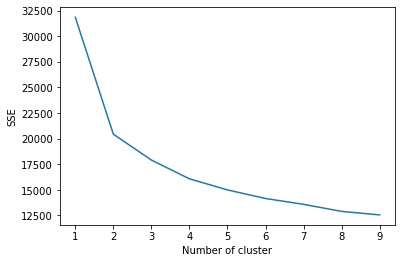

In [47]:
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [53]:
kmc_cl = KMeans(n_clusters=3)
labels=kmc_cl.fit_predict(jaccard_df)

In [54]:
print(metrics.silhouette_score(jaccard_df, labels))#, metric='precomputed'))

0.2924688135565922
